Class
0.0    67264
1.0      169
Name: count, dtype: int64

Logistic Regression Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13453
         1.0       0.68      0.62      0.65        34

    accuracy                           1.00     13487
   macro avg       0.84      0.81      0.82     13487
weighted avg       1.00      1.00      1.00     13487


Random Forest Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13453
         1.0       0.86      0.74      0.79        34

    accuracy                           1.00     13487
   macro avg       0.93      0.87      0.90     13487
weighted avg       1.00      1.00      1.00     13487



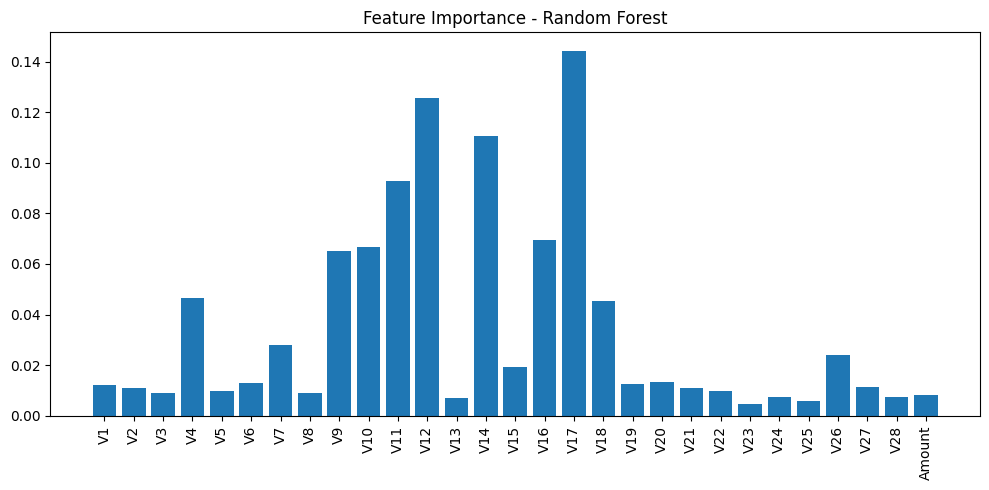

Model saved successfully!


In [3]:
# Credit Card Fraud Detection - Random Forest

import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv("/content/creditcard.csv")

# Handle NaN values in the target variable if any
df.dropna(subset=['Class'], inplace=True)

# Check class imbalance
print(df['Class'].value_counts())

# Separate features & target
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# Scale Amount column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Baseline Model - Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("\nLogistic Regression Report:\n")
print(classification_report(y_test, lr_preds))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\nRandom Forest Report:\n")
print(classification_report(y_test, rf_preds))

# Feature Importance Plot
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf, "random_forest_fraud_model.pkl")
print("Model saved successfully!")